<a href="https://colab.research.google.com/github/Balla01/mini-project/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from skimage.io import imread
from skimage.transform import resize
target = []
image = []
flat_data =[]

DATADIR = '/content/drive/MyDrive/project photos'
CATEGORIES = ['pics of charging cables','pics of mobile phones']

for category in CATEGORIES:
 class_num = CATEGORIES.index(category)
 path = os.path.join(DATADIR,category)
 for img in os.listdir(path):
   img_array = imread(os.path.join(path,img))
   img_resized = resize(img_array,(150,150,3))
   flat_data.append(img_resized.flatten())
   image.append(img_resized)
   target.append(class_num)

   
flat_data=np.array(flat_data)
target=np.array(target)
image=np.array(image)



  

  

In [2]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=109)

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]
svc=svm.SVC(probability=True)
clf=GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)              



GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [4]:
flat_data[0]

array([0.99607843, 0.99607843, 0.99607843, ..., 0.99607843, 0.99607843,
       0.99607843])

In [5]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [6]:
y_pred=clf.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0])

In [7]:
y_test

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0])

In [8]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [10]:
accuracy_score(y_pred,y_test)

1.0

In [12]:
confusion_matrix(y_pred,y_test)

array([[11,  0],
       [ 0,  7]])

In [13]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [14]:
model=pickle.load(open('img_model.p','rb'))

PREDICTED OUTPUT:pics of mobile phones


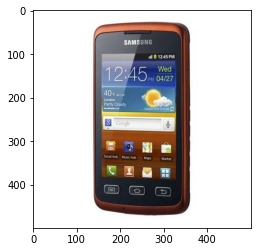

In [26]:
flat_data = []
path = '/content/drive/MyDrive/picss/phone/Rc9bf521cde1ab4f42db200643778daca.jpg'
img = plt.imread(path)
plt.imshow(img)
img_resized=resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT:{y_out}')